In [60]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn import tree
from anytree import Node, RenderTree
import random
import math

In [114]:
titanic = pd.read_csv('titanic/train.csv')
trainandtest = pd.read_csv('titanic/combi3.csv')
train = pd.read_csv('titanic/newtrain.csv')
test = pd.read_csv('titanic/newtest.csv')

In [117]:
print(trainandtest)

                                            PassengerId  Pclass  \
0                                                     1     3.0   
1                                                     2     1.0   
2                                                     3     3.0   
3                                                     4     1.0   
4                                                     5     3.0   
5                                                     6     3.0   
6                                                     7     1.0   
7                                                     8     3.0   
8                                                     9     3.0   
9                                                    10     2.0   
10                                                   11     3.0   
11                                                   12     1.0   
12                                                   13     3.0   
13                                                   14     3.

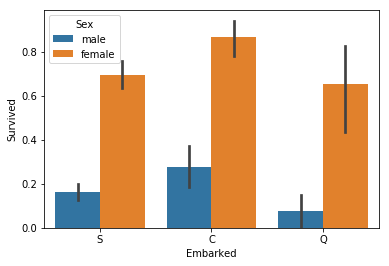

In [116]:
sns.barplot(x = "Embarked", y = "Survived", hue = "Sex", data = trainandtest)

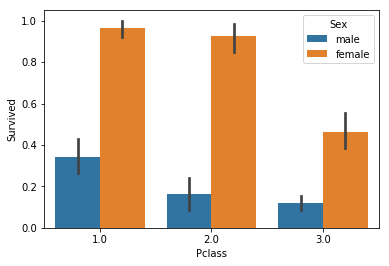

In [119]:
sns.barplot(x = "Pclass", y = "Survived", hue = "Sex", data = trainandtest)

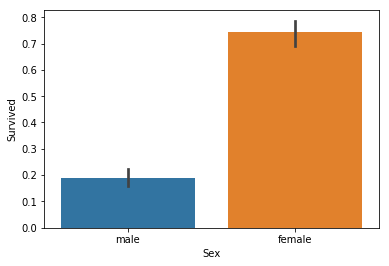

In [65]:
sns.barplot(x = "Sex", y = "Survived", data = titanic)

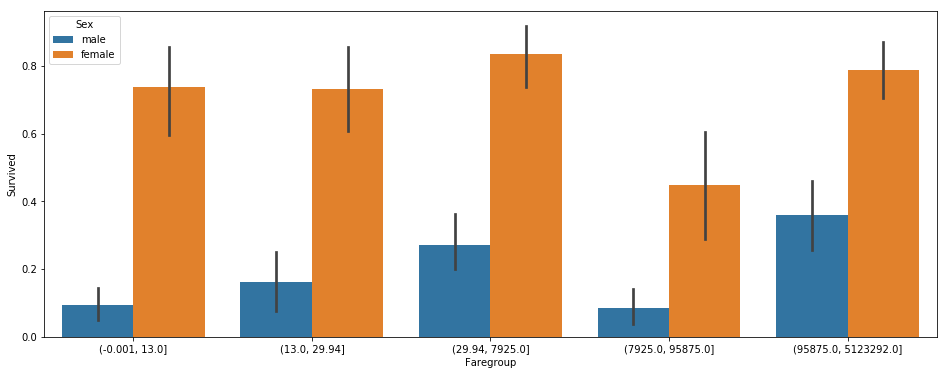

In [122]:
# categorize dataset into equal groups based on fare

def categorize_fare(df):
    df["Faregroup"] = pd.qcut(df.Fare, 5)
    
categorize_fare(trainandtest)

# create bar plot of groups
fig, ax = plt.subplots(figsize = (16,6))
sns.barplot(x = "Faregroup", y="Survived", hue="Sex", data=trainandtest, ax=ax)
plt.show()

In [123]:
# Determine of each passenger whether they were in company, and what type of company
def categorize_company(df):
    
    # 0 if alone, 1 if only with siblings/spouse, 2 if only with parent/children, 3 if with both (number of people is disregarded)
    conditions = [(df.Parch + df.SibSp == 0), (df.Parch == 0) & (df.SibSp > 0), (df.Parch > 0) & (df.SibSp ==0),
                  (df.Parch > 0) & (df.SibSp > 0)]
    categories = [0, 1, 2, 3]
    
    # create company attribute
    df["Company"] = np.select(conditions, categories)
    
    # count companions
    df["Companions"] = df.SibSp + df.Parch
    
    # create alone attribute (1 if alone, 0 if not)
    df["Alone"] = np.where(df.Parch + df.SibSp > 0, 0, 1)
        
categorize_company(trainandtest)

# visualize
# sns.barplot(x = "Company", y = "Survived", data = titanic)
# sns.barplot(x = "Company", y = "Survived", hue = "Agegroup", data = titanic)
# sns.countplot(x = "Company", hue = "Agegroup", data = titanic)

In [125]:
# subtract title from name

def format_name(df):
    
    # determine last name (for family indication)
    df['Lname'] = df.Name.apply(lambda x: x.split(', ')[0])
    
    # determine prefix
    df['NamePrefix'] = df.Name.apply(lambda x: x.split(', ')[1])
    df['NamePrefix'] = df.NamePrefix.apply(lambda x: x.split(' ')[0].split('.')[0].strip())
    
    # dictionary of all options to categories
    normalized_titles = {
    "Capt":       "Officer",
    "Col":        "Officer",
    "Major":      "Officer",
    "Jonkheer":   "Royalty",
    "Don":        "Royalty",
    "Sir" :       "Royalty",
    "Dr":         "Officer",
    "Rev":        "Officer",
    "the":        "Royalty",
    "Dona":       "Royalty",
    "Mme":        "Mrs",
    "Mlle":       "Miss",
    "Ms":         "Mrs",
    "Mr" :        "Mr",
    "Mrs" :       "Mrs",
    "Miss" :      "Miss",
    "Master" :    "Master",
    "Lady" :      "Royalty"
    }
    
    # assign title to each passenger
    df["NamePrefix"] = titanic.NamePrefix.map(normalized_titles)
    return df   


format_name(trainandtest)
fig, ax = plt.subplots(figsize = (16, 6))
# sns.countplot(x = "NamePrefix", data=titanic, ax=ax)
sns.barplot(x = "NamePrefix", y = "Survived", data = trainandtest, ax=ax)
plt.show()

# fill in missing ages based on age, title and class
def categorize_age(df):
    
    # get values of sex, class and title
    specAge = titanic.groupby(["Sex", "Pclass", "NamePrefix"])
    
    # determine the median age of each sex-class-title combinations
    specAge.Age.median()
    
    # fill in median age of sex-class-title combination when age data is missing
    titanic.Age = specAge.Age.apply(lambda x: x.fillna(x.median()))
    
    # group dataset in age categories
    bins = (0, 4, 12, 18, 25, 35, 60, 100)
    agename = ["0-4", "4-12", "12-18", "18-25", "25-35", "35-60", "60-100"]
    df["Agegroup"] = pd.cut(df.Age, bins, labels = agename)
    
categorize_age(trainandtest)

sns.barplot(x = "Agegroup", y = "Survived", data = trainandtest)

AttributeError: 'float' object has no attribute 'split'

In [69]:
# delete unneccesary attributes
def drop_attributes(df):
    return df.drop(['Ticket', 'Cabin'], axis=1)

drop_attributes(titanic)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Faregroup,Company,Companions,Alone,Lname,NamePrefix,Agegroup
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,"(-0.001, 7.854]",1,1,0,Braund,Mr,18-25
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,"(39.688, 512.329]",1,1,0,Cumings,Mrs,35-60
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,"(7.854, 10.5]",0,0,1,Heikkinen,Miss,25-35
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,"(39.688, 512.329]",1,1,0,Futrelle,Mrs,25-35
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,"(7.854, 10.5]",0,0,1,Allen,Mr,25-35
5,6,0,3,"Moran, Mr. James",male,26.0,0,0,8.4583,Q,"(7.854, 10.5]",0,0,1,Moran,Mr,25-35
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,51.8625,S,"(39.688, 512.329]",0,0,1,McCarthy,Mr,35-60
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,21.0750,S,"(10.5, 21.679]",3,4,0,Palsson,Master,0-4
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,11.1333,S,"(10.5, 21.679]",2,2,0,Johnson,Mrs,25-35
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,30.0708,C,"(21.679, 39.688]",1,1,0,Nasser,Mrs,12-18


In [127]:
# predict survival based on gender
def gender_prediction(df):
    
    # predict that females survive, males don't
    df["Pred"] = np.where(df["Sex"] == "female", 1, 0)

# ..or on class
def class_prediction(df):
    
    # predict that first class survives, others don't
    df["Pred"] = np.where(df["Pclass"] > 1, 0, 1)
    
# ..or on company type (0/1/2/3)
def company_prediction(df):
    
    # predict that people with only siblings/spouse, or only parent/children survive, other don't
    df["Pred"] = np.where((df["Company"] == 2) | (df["Company"] == 1), 1, 0)
    
# ..or on age(group)
def age_prediction(df):
    
    # predict that only the youngest agegroup (0-4) survives
    df["Pred"] = np.where(df["Agegroup"] == "0-4", 1, 0)

    
# check if prediction is correct (in training data)
def check_prediction(df):
    df["Correct"] = np.where(df.Pred == df.Survived, 1, 0)
    return df["Correct"].sum()
    
# test all 1R algorithms
gender_prediction(titanic)
cor = check_prediction(titanic)
print("Num correct gender prediction", cor)

# class_prediction(titanic)
# cor = check_prediction(titanic)
# print("Num correct class prediction", cor)

# company_prediction(titanic)
# cor = check_prediction(titanic)
# print("Num correct company prediction", cor)

# age_prediction(titanic)
# cor = check_prediction(titanic)
# print("Num correct age prediction", cor)

Num correct gender prediction 701


Num class prediction 233
Num company prediction 149
Num age prediction 234
Num companions prediction 242


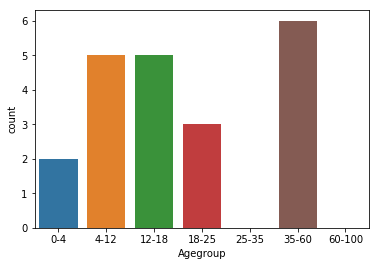

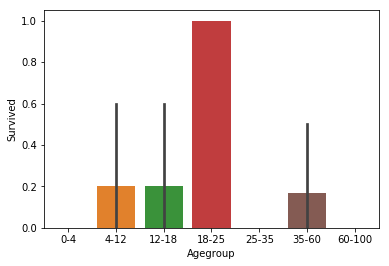

Num correct age prediction 475
Num correct company prediction 25
Num correct title prediction 474


In [71]:
def class_prediction_1and2(df):
    
    # predict that first class survives, others don't
    df["Pred"] = np.where(df["Pclass"] > 2, 0, 1)
    
def age_prediction_female(df):
    
    # predict that only the youngest agegroup (0-4) survives
    df["Pred"] = np.where(df["Agegroup"] == "4-12", 0, 1)
    
# or based on number of companions
def companions_prediction_female(df):
    
    df["Pred"] = np.where(df.Companions > 4, 0, 1)

# decision tree

# print(femaleData)

# divide data into male/female datasets
maleData = titanic[titanic["Sex"] == "male"]
femaleData = titanic[titanic["Sex"] == "female"]

# sns.countplot(x = "Companions", data = femaleData)
# sns.barplot(x = "Companions", y = "Survived", hue = "Sex", data = titanic)
class_prediction_1and2(femaleData)
cor = check_prediction(femaleData)
print("Num class prediction", cor)

company_prediction(femaleData)
cor = check_prediction(femaleData)
print("Num company prediction", cor)

age_prediction_female(femaleData)
cor = check_prediction(femaleData)
print("Num age prediction", cor)

companions_prediction_female(femaleData)
cor = check_prediction(femaleData)
print("Num companions prediction", cor)

femaleDataless = femaleData[femaleData["Companions"] <= 4]
femaleDatamore = femaleData[femaleData["Companions"] > 4]

fig, ax = plt.subplots()
sns.countplot(x = "Agegroup", data = femaleDatamore, ax = ax)
plt.show()
fig1, ax1 = plt.subplots()
sns.barplot(x = "Agegroup", y = "Survived", data = femaleDatamore, ax = ax1)
plt.show()

# divide male data into young males (under 12) dataset
youngMales = maleData[maleData["Age"] <= 12] 
youngMalesFamily = youngMales[youngMales["Company"] == 3]
# print(youngMalesFamily)

# sns.countplot(x = "Faregroup", data = youngMalesFamily)
# sns.barplot(x = "Faregroup", y = "Survived", data = youngMalesFamily)

age_prediction(maleData)
cor = check_prediction(maleData)
print("Num correct age prediction", cor)

company_prediction(youngMales)
cor = check_prediction(youngMales)
print("Num correct company prediction", cor)

def title_prediction(df):
    df["Pred"] = np.where(df["NamePrefix"] == "Master", 1, 0)
    
title_prediction(maleData)
cor = check_prediction(maleData)
print("Num correct title prediction", cor)

(79.12457912457911, 'NamePrefix')
['Master', 'Miss', 'Mr', 'Mrs', 'Officer', 'Royalty']


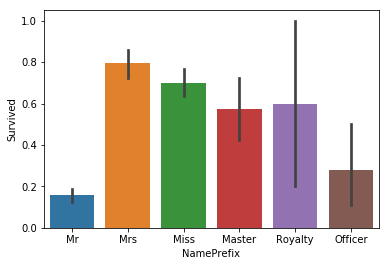

In [72]:
pd.options.mode.chained_assignment = None  # default='warn'

def informative_attributes(df, options):
    
#     print("Total length data:", len(df))

    all_correct = []
    
    for attribute in options:
        
        g = df.groupby([attribute])
        rates = round(g.Survived.mean())
        df["Pred"] = df[attribute].map(rates)
        all_correct.append(check_prediction(df))
#         print(attribute, all_correct[-1])
        
#     print("Percentage correct:", (max(all_correct)/len(df))*100)
    return (max(all_correct)/len(df))*100, options[all_correct.index(max(all_correct))]

def next_step_tree(df, attribute):
    
    g = df.groupby([attribute])
    categories = list(g.groups)
    
    datasets = []
    
    for c in categories:
        datasets.append(df[df[attribute] == c])
        
    return categories, datasets

def perform_next_step(df, opts):
    
    best_attribute = informative_attributes(df, opts)
    print(best_attribute)
    opts.remove(best_attribute[1])
    new_datasets = next_step_tree(df, best_attribute[1])
    print(new_datasets[0])
    new_options = new_datasets[0]
    
    if best_attribute[0] == 100:
        print("finish")

    

options = ["Sex", "Agegroup", "Pclass", "Company", "Faregroup", "Alone", "Companions", "NamePrefix"]
perform_next_step(titanic, options)
# dataset = titanic
    
# first_attribute = informative_attributes(dataset, options)
# print(first_attribute[1], "(Percentage correct:", first_attribute[0], ")")

# options.remove(first_attribute[1])

# separate_datasets = next_step_tree(titanic, str(first_attribute[1]))
# for setdata in separate_datasets[1]:
#     setoptions = options
#     next_attribute = informative_attributes(setdata, setoptions)
#     print("\t", next_attribute[1], "(Percentage correct:", next_attribute[0], ")")
#     setoptions.remove(next_attribute[1])
#     separate_setdata = next_step_tree(setdata, str(next_attribute[1]))
#     for setsetdata in separate_setdata:
#         setsetoptions = setoptions
#         next_next_attribute = informative_attributes(setsetdata, setsetoptions)
#         print("\t \t", next_next_attribute[1], "(Percentage correct:", next_next_attribute[0], ")")
        


sns.barplot(x = "NamePrefix", y = "Survived", data = titanic)

In [99]:
pd.options.mode.chained_assignment = None  # default='warn'

def informative_attributes(df, options, test = None):

    all_correct = []
    
    for attribute in options:
        
        g = df.groupby([attribute])
        rates = round(g.Survived.mean())
        df["Pred"] = df[attribute].map(rates)
        all_correct.append(check_prediction(df))
        
#     titanic.merge(df, how = "left")
        
    for i in df.Name:
        titanic["Pred"][titanic["Name"] == i] = df["Pred"][df["Name"] == i]    
                
        
    return (max(all_correct)/len(df))*100, options[all_correct.index(max(all_correct))]




def next_step_tree(df, attribute):
    
    g = df.groupby([attribute])
    categories = list(g.groups)
    
    datasets = []
    
    for c in categories:
        datasets.append(df[df[attribute] == c])
        
    return categories, datasets

def perform_next_step(datasets, parent):
    
    nodes_gen = {}
    new_datasets = []
    keys = []
    ghostnode = Node("ghost", parent = parent)
    options = get_options(ghostnode)
    tempnodes = []

    for ds in datasets:
        attr = informative_attributes(ds, options)
        key = attr[1] + str(random.randint(0, 100))
        if attr[0] < 100 and math.isnan(attr[0]) == False:
            nodes_gen[key] = Node(attr[1] + "(" + str(attr[0]) +")", parent = parent)
            keys.append(key)
            new_datasets.append(next_step_tree(ds, attr[1])[1])
        elif len(ds) > 0:
            tempnodes.append(Node(attr[1] + "(" + str(attr[0]) +")", parent = parent))
            
            tempnodes.append(Node(str(ds.Pred.iloc[0]), parent = tempnodes[-1]))

            
    ghostnode.parent = None
            
    return nodes_gen, new_datasets, keys

def get_options(node):
    
    tempoptions = ["Sex", "Agegroup", "Pclass", "Company", "Faregroup", "Alone", "Companions"]

    for n in (node.anchestors):
        toberemoved = ''.join(filter(str.isalpha, n.name))
        if toberemoved in tempoptions:
            tempoptions.remove(toberemoved)   
    return tempoptions

    

options = ["Sex", "Agegroup", "Pclass", "Company", "Faregroup", "Alone", "Companions"]

# dataset = titanic

print("Welkom!")
    
first_attribute = informative_attributes(titanic, options)
print("First", first_attribute)
nodes_gen0 =Node(first_attribute[1] + str(int(first_attribute[0])))
options.remove(first_attribute[1])
datasets = next_step_tree(titanic, first_attribute[1])

newnodes, newdata, newkeys = perform_next_step(datasets[1], parent = nodes_gen0)

for i in range(len(newdata)):
    newnodes_1, newdata_1, newkeys_1 = perform_next_step(newdata[i], parent = newnodes[newkeys[i]])
    for j in range(len(newnodes_1)):
        newnodes_2, newdata_2, newkeys_2 = perform_next_step(newdata_1[j], parent = newnodes_1[newkeys_1[j]])
        for k in range(len(newnodes_2)):
            newnodes_3, newdata_3, newkeys_3 = perform_next_step(newdata_2[k], parent = newnodes_2[newkeys_2[k]])
            for l in range(len(newnodes_3)):
                perform_next_step(newdata_3[l], parent = newnodes_3[newkeys_3[l]])
            

        
# for pre, fill, node in RenderTree(nodes_gen0):
#     print("%s%s" % (pre, node.name))
    
print(check_prediction(titanic))


# from anytree.exporter import DotExporter
# # graphviz needs to be installed for the next line!
# DotExporter(nodes_gen0).to_picture("nodes_gen0.png")


Welkom!
First (78.67564534231201, 'Sex')


C:\Users\tessa\Miniconda3\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in longlong_scalars


770


In [ ]:
def step(newnodes, newdata, newkeys):
    for i in range(len(newdata)):
        tempnewnodes, tempnewdata, tempnewkeys = perform_next_step(newdata[i], parent = newnodes[newkeys[i]])
        
    return tempnewnodes, tempnewdata, tempnewkeys
    

options = ["Sex", "Agegroup", "Pclass", "Company", "Faregroup", "Alone", "Companions"]

first_attribute = informative_attributes(titanic, options)
print("Second", first_attribute)
secondtree =Node(first_attribute[1] + str(int(first_attribute[0])))
options.remove(first_attribute[1])
datasets = next_step_tree(titanic, first_attribute[1])

newnodes, newdata, newkeys = perform_next_step(datasets[1], parent = secondtree)

counter = 0
while counter < 10:
    tempnewnodes, tempnewdata, tempnewkeys = step(newnodes, newdata, newkeys)
    counter += 1
    
    
for pre, fill, node in RenderTree(secondtree):
    print("%s%s" % (pre, node.name))